<a href="https://colab.research.google.com/github/hyy-cv/start/blob/master/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

#warning 무시
import warnings
warnings.filterwarnings('ignore')

import os

In [0]:
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False
num_predictions = 20

In [31]:
#cifar10 데이터를 로드하고 트레인, 테스트 데이터로 나누기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [32]:
#binary class metrics로 변환
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [0]:
#train 데이터들의 자료형을 float 32비트로 바꾸기
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

**네트워크 설계하기**




In [0]:

model = Sequential()

model.add(Conv2D(32, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.5))
model.add(Dense(10))

model.add(Activation('softmax'))
         

In [0]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

In [0]:
# optimizer는 RMSprop으로 설정
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [26]:
trained_model = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,                
          validation_data=(x_test, y_test),
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 43s 864us/step - loss: 1.7529 - acc: 0.3648 - val_loss: 1.4269 - val_acc: 0.4795
Epoch 2/20
50000/50000 [==============================] - 44s 879us/step - loss: 1.3686 - acc: 0.5029 - val_loss: 1.1820 - val_acc: 0.5845
Epoch 3/20
50000/50000 [==============================] - 45s 906us/step - loss: 1.2039 - acc: 0.5711 - val_loss: 1.0911 - val_acc: 0.6190
Epoch 4/20
50000/50000 [==============================] - 45s 908us/step - loss: 1.0890 - acc: 0.6154 - val_loss: 0.9899 - val_acc: 0.6489
Epoch 5/20
50000/50000 [==============================] - 45s 908us/step - loss: 1.0016 - acc: 0.6466 - val_loss: 0.8711 - val_acc: 0.6945
Epoch 6/20
50000/50000 [==============================] - 45s 904us/step - loss: 0.9322 - acc: 0.6703 - val_loss: 0.7976 - val_acc: 0.7190
Epoch 7/20
50000/50000 [==============================] - 45s 906us/step - loss: 0.8827 - acc: 0.6889 - val_loss: 0.

In [0]:
epochs_range = range(20)
validation_accuracy = trained_model.history['val_acc']
training_accuracy = trained_model.history['acc']

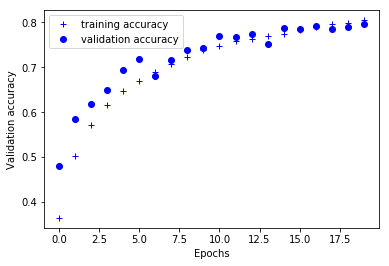

In [28]:
import matplotlib.pyplot as plt

#정확도 그래프에 그리기

plt.plot(epochs_range, training_accuracy, 'b+', label='training accuracy')
plt.plot(epochs_range, validation_accuracy, 'bo', label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
plt.legend()

plt.show()

In [29]:
#모델 평가하기
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 231us/step
Test loss: 0.6316912795543671
Test accuracy: 0.795
